In [1]:
import pandas as pd
import torch
import numpy as np
import random
np.random.seed(17)
random.seed(17)
torch.manual_seed(17)
import data
from models import LinearPytorchModel
from agent import Agent
from matplotlib import pyplot as plt
import seaborn as sns

The history saving thread hit an unexpected error (DatabaseError('database disk image is malformed')).History will not be written to the database.


tensor(0.1923, dtype=torch.float64) tensor(0.1538, dtype=torch.float64)
model saved, loss =  0.10697717838192737


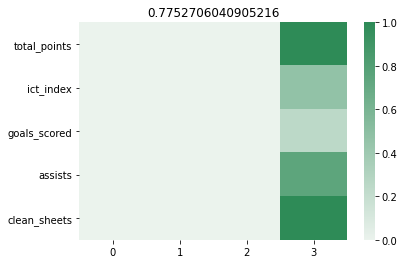

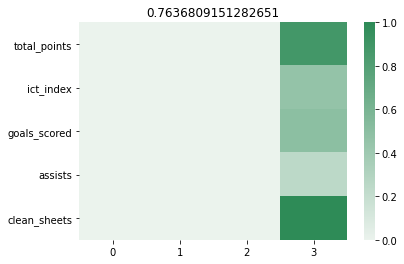

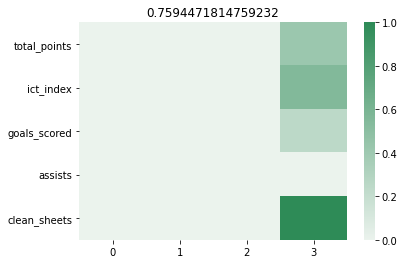

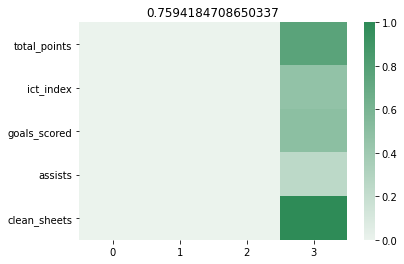

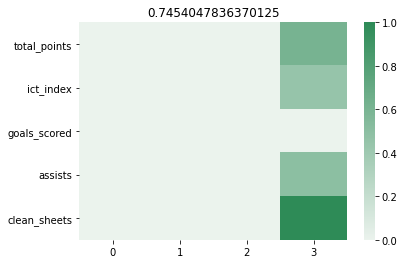

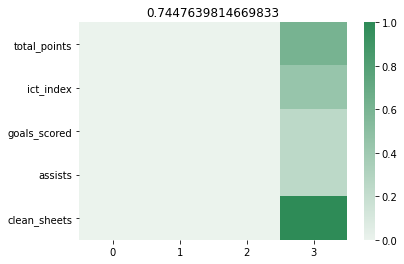

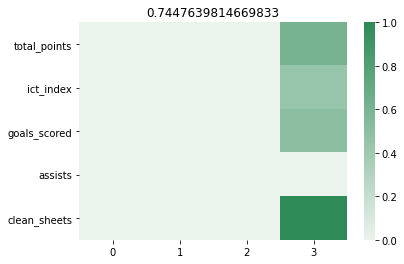

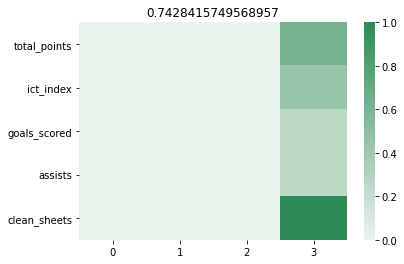

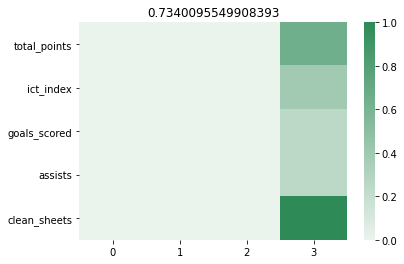

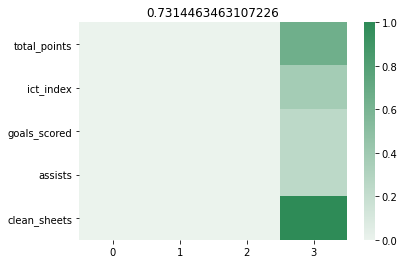

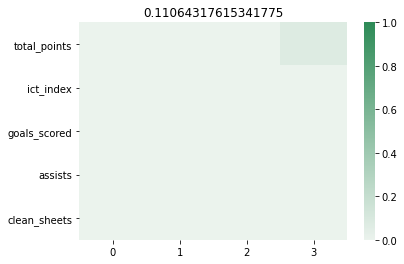

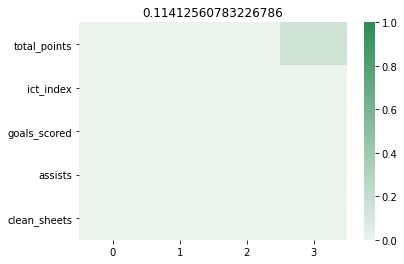

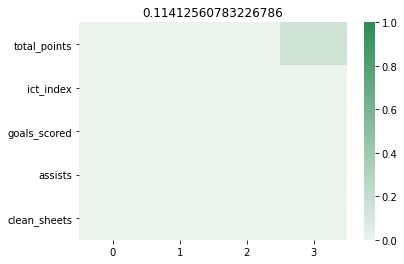

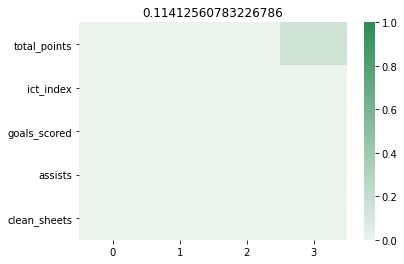

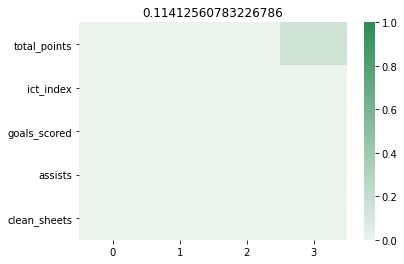

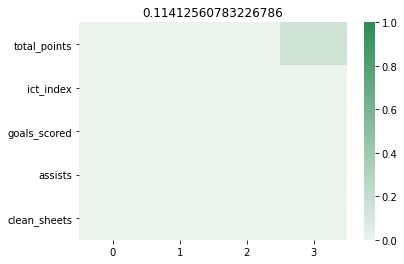

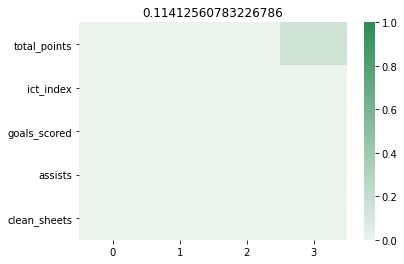

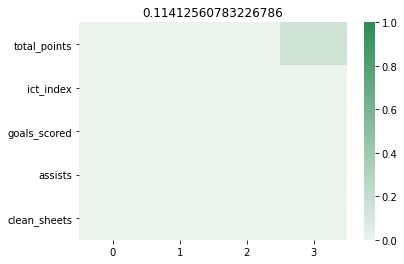

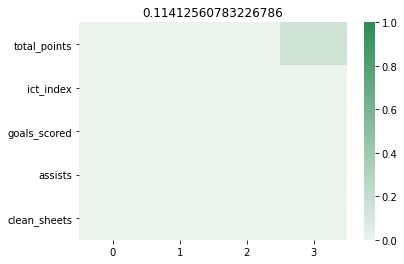

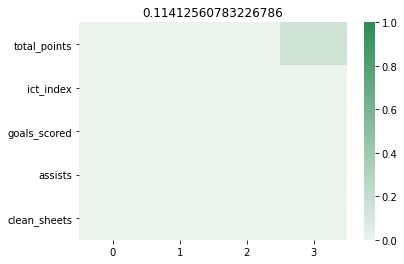

In [2]:
player_features = ['total_points', 'ict_index', 'goals_scored', 'assists', 'clean_sheets']
model_paths = ["./trained_models/simple_linear_model.pt"]
data_object = data.Data()
agent = Agent(data_object=data_object, player_features=player_features, opposition_features=[], model_class=LinearPytorchModel, model_path=model_paths[0], visualize = True)
agent.update_model()

In [2]:
player_features = ['total_points', 'ict_index', 'goals_scored', 'assists', 'clean_sheets', 'saves']
opposition_features = [ "npxGA"]
model_paths = ["./trained_models/simple_linear_model_opposition.pt"]
data_object = data.Data()
agent = Agent(data_object=data_object, player_features=player_features, opposition_features=opposition_features, model_class=LinearPytorchModel, model_path=model_paths[0], visualize = False)
agent.update_model()

Arsenal
Aston Villa
Brighton
Burnley
Chelsea
Crystal Palace
Everton
Fulham
Leicester
Leeds
Liverpool
Manchester City
Manchester United
Newcastle United
Sheffield United
Southampton
Tottenham
West Bromwich Albion
West Ham
Wolverhampton Wanderers
tensor(0.1923, dtype=torch.float64) tensor(0.1538, dtype=torch.float64)
model saved, loss =  0.052855625643890645


tensor([[8.0000, 2.0000, 2.0000, 0.0000],
        [6.9000, 1.9000, 0.7000, 0.0000],
        [1.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000],
        [1.0000, 0.0000, 0.0000, 0.0000]], dtype=torch.float64)
tensor([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]], dtype=torch.float64)
[]


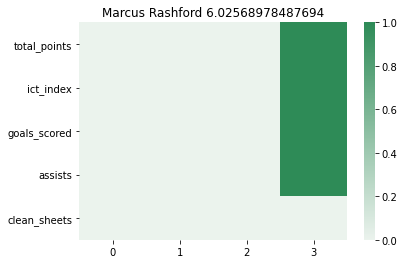

In [3]:
next_performances = agent.predict_next_performance()
print(agent.opposition_features)
for i, row in next_performances.iterrows():
    plt.title(f"{row['name']} {row['predicted_total_points']}")
    sns.heatmap(row['input_feature'].reshape((agent.num_features, -1)), yticklabels = agent.features, cmap = sns.light_palette("seagreen", as_cmap = True), vmin = 0, vmax = 1)
    plt.show()
    break